## Linear Regression

We are interested in exploring different approaches to formulate a linear regression problem.

We assume the data we have available follows a model of the form
$$
  y = \beta_{0}+\beta_{1}x_1+\dots+\beta_{n}x_n + e ,
$$
where $e\sim N(0,\sigma^{2})$, and we wish to find reasonable approximations for the values of the parameters $\beta_i$, $i = 0, 1, \ldots n$, as well as for $\sigma$.

We start by generating random data from a model of this form.


In [1]:
# Import the required libraries

%matplotlib notebook
import numpy as np
import time
np.random.seed(1234)

# We first generate random values for the parameters of the model (as uniform integers in [-10,10])

nvars = 20

beta = np.random.randint(-10,10,size=([nvars+1,1]))

# Generate the random data for the observations from the model (the values of x and y)

ntrain = 1000
ntest = 100
nsample = ntrain + ntest

## Values for the x's (using uniform random numbers) in the sample set

X0_s = np.ones([nsample,1]) # the first column has all values equal to one for the coefficients of beta_0
X1_s = np.random.uniform(0,10,([nsample,nvars]))
X_s = np.concatenate([X0_s, X1_s],axis=1)

## Values for the normal errors

error_s = np.random.normal(0,1,(nsample,1))

## Values for the y's

Y_s = np.dot(X_s,beta) + error_s

## Extract the training and testing subsets

X = X_s[0:ntrain,:]
Y = Y_s[0:ntrain]

X_t = X_s[(ntrain+1):nsample,:]
Y_t = Y_s[(ntrain+1):nsample]

## Print the values

print('Values of the original coefficients:')
for i in range(nvars+1):
    print('beta %3d %6.1f' %(i,beta[i]))


Values of the original coefficients:
beta   0    5.0
beta   1    9.0
beta   2   -4.0
beta   3    2.0
beta   4    5.0
beta   5    7.0
beta   6   -1.0
beta   7    1.0
beta   8    2.0
beta   9    6.0
beta  10   -5.0
beta  11    6.0
beta  12   -1.0
beta  13    5.0
beta  14    8.0
beta  15    6.0
beta  16    2.0
beta  17   -5.0
beta  18   -8.0
beta  19   -4.0
beta  20   -7.0


To get an intuition on the behavior of the data with respect to the model, we plot the data with respect to any of the variables:

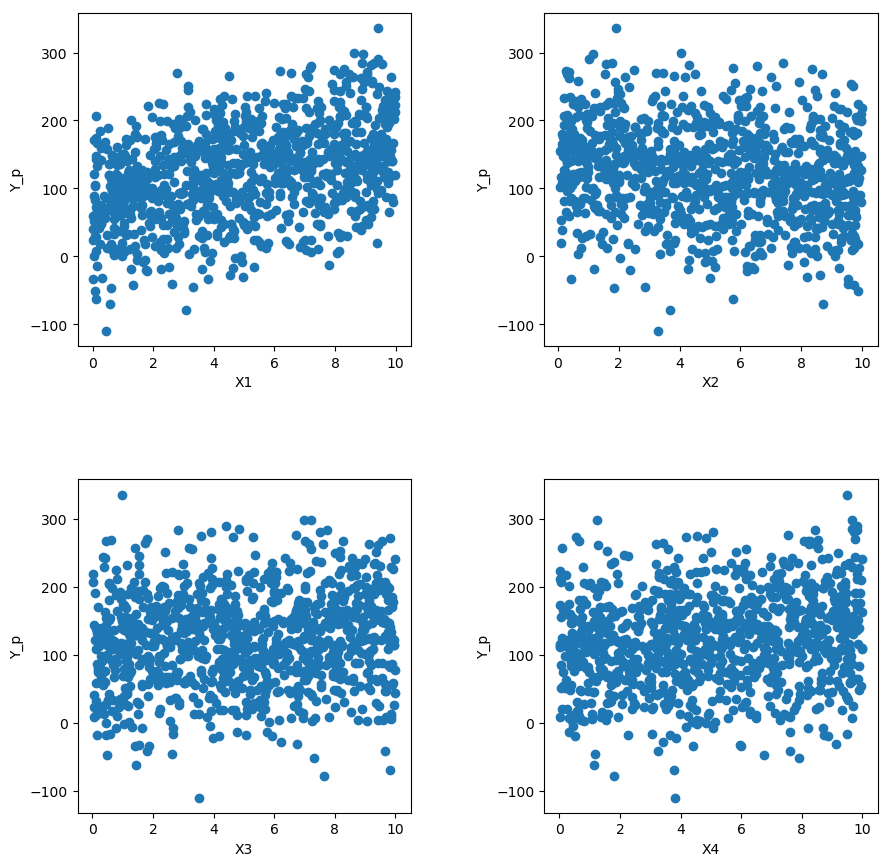

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Y_p = np.array(Y) # convert to array for plotting

# Plot four of the variables

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.scatter(X[:,1], Y_p),plt.xlabel('X1'),plt.ylabel('Y_p')

plt.subplot(2, 2, 2)
plt.scatter(X[:,2], Y_p),plt.xlabel('X2'),plt.ylabel('Y_p')

plt.subplot(2, 2, 3)
plt.scatter(X[:,3], Y_p),plt.xlabel('X3'),plt.ylabel('Y_p')

plt.subplot(2, 2, 4)
plt.scatter(X[:,4], Y_p),plt.xlabel('X4'),plt.ylabel('Y_p')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace = 0.4, hspace = 0.4)

plt.show()


## The least-squares linear regression model

Problem: Fit a linear relation between a set of variables ($X$) with respect to a response variable ($y$), that is, find the best values of the parameters ($\beta$) for the given data.

Model: $y = X\beta + u$

Classical estimation criterion: least squares, minimize the sum of the squares of the errors (residuals)

\begin{align*}
  \text{minimize}_\beta \quad & \|y-X\beta\|^2_2
\end{align*}

### Compute the exact explicit solution

The exact optimal solution of the preceding problem is: $\beta_{ls}=(X^T X)^{-1}X^T y$


In [3]:
# Compute the exact solution

from numpy.linalg import inv

## Measure the time required to obtain this solution

time_start = time.process_time()

## Apply the formula

beta_ls_exact = np.dot(np.dot(inv(np.dot((X.T),X)),X.T),Y)

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Values of the (exact) least squares coefficients:')
for i in range(nvars+1):
    print('beta %3d %7.3f' %(i,beta_ls_exact[i]))
print('Elapsed time = %8.5f' %(time_elapsed))


Values of the (exact) least squares coefficients:
beta   0   5.130
beta   1   9.000
beta   2  -4.005
beta   3   1.994
beta   4   4.995
beta   5   6.997
beta   6  -1.007
beta   7   1.008
beta   8   1.981
beta   9   5.998
beta  10  -4.991
beta  11   6.005
beta  12  -1.001
beta  13   4.998
beta  14   7.997
beta  15   6.000
beta  16   2.003
beta  17  -5.000
beta  18  -8.003
beta  19  -3.985
beta  20  -7.008
Elapsed time =  0.00354


### Compute the solution using Sklearn

In [4]:
# Import and use the routine in the SkLearn library

from sklearn import linear_model

time_start = time.process_time()

regr = linear_model.LinearRegression(fit_intercept=False)

regr.fit(X,Y)

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Values of the (exact) least squares coefficients - Sklearn:')
for i in range(nvars+1):
    print('beta %3d %7.3f' %(i,regr.coef_[0,i]))
print('Elapsed time = %8.5f' %(time_elapsed))


Values of the (exact) least squares coefficients - Sklearn:
beta   0   5.130
beta   1   9.000
beta   2  -4.005
beta   3   1.994
beta   4   4.995
beta   5   6.997
beta   6  -1.007
beta   7   1.008
beta   8   1.981
beta   9   5.998
beta  10  -4.991
beta  11   6.005
beta  12  -1.001
beta  13   4.998
beta  14   7.997
beta  15   6.000
beta  16   2.003
beta  17  -5.000
beta  18  -8.003
beta  19  -3.985
beta  20  -7.008
Elapsed time =  0.00425


### Find the coefficient estimates by solving a least-squares optimization problem

In [5]:
from scipy.optimize import minimize
import numpy as np
# Define the objective function as the sum of squares of the errors

def least_sq_reg(beta_ls, X, Y):
    beta_ls = np.matrix(beta_ls)
    z = Y - np.dot(X,beta_ls.T)
    return np.dot(z.T,z)

beta_ls0 = np.zeros(nvars+1)

time_start = time.process_time()

## Solve the optimization algorithm using a derivative-free method

res = minimize(least_sq_reg, beta_ls0, args=(X, Y), method='Nelder-Mead', options={'disp': True,'xtol': 1e-10})

time_elapsed = (time.process_time() - time_start)

## Print results

print('\nValues of the least squares coefficients obtained with Nelder-Mead:')
for i in range(nvars+1):
    print('beta %3d %7.3f' %(i,res.x[i]))

err_val_1 = np.linalg.norm(beta_ls_exact.T-res.x,ord=2)/np.linalg.norm(beta_ls_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)



Values of the least squares coefficients obtained with Nelder-Mead:
beta   0  15.802
beta   1   3.074
beta   2   1.754
beta   3   4.545
beta   4   0.591
beta   5   6.021
beta   6  -1.075
beta   7   1.792
beta   8   4.984
beta   9  10.884
beta  10  -5.210
beta  11   5.783
beta  12   0.151
beta  13   3.938
beta  14  -4.914
beta  15   2.822
beta  16  -7.485
beta  17  -4.466
beta  18  -5.938
beta  19   6.108
beta  20  -6.529

Error in values of coefficients =   1.0255


Introduce the gradient and hessian information:

In [ ]:
# Define the first and second derivatives of the problem

def least_sq_reg_der(beta_ls,X,Y):
    beta_ls = np.matrix(beta_ls)
    pp = -2*np.dot((Y-np.dot(X,(beta_ls).T)).T,X)
    aa = np.squeeze(np.asarray(pp))
    return aa

def least_sq_reg_hess(beta_ls,X,Y):
    ss = 2*np.dot(np.transpose(X),X)
    return ss

time_start = time.process_time()

## Solve using a variant of Newton's method
                   
res = minimize(least_sq_reg, beta_ls0, args=(X, Y), method='Newton-CG', jac=least_sq_reg_der, hess=least_sq_reg_hess, options={'disp': True})

time_elapsed = (time.process_time() - time_start) 

## Print the results

print('\nValues of the least squares coefficients obtained with Newton-CG:')
for i in range(nvars+1):
    print('beta %3d %7.3f' %(i,res.x[i]))
print('Elapsed time = %8.5f' %(time_elapsed))

#np.linalg.inv(least_sq_reg_hess(res.x,X,Y))

err_val_2 = np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_2)
   

In [ ]:
time_start = time.process_time()

## Solve using a Quasi-Newton's method
                   
res = minimize(least_sq_reg, beta_ls0, args=(X, Y), method='BFGS', jac=least_sq_reg_der, options={'disp': True})

time_elapsed = (time.process_time() - time_start) 

## Print the results

print('\nValues of the least squares coefficients obtained with BFGS:')
for i in range(nvars+1):
    print('beta %3d %7.3f' %(i,res.x[i]))
print('Elapsed time = %8.5f' %(time_elapsed))

#np.linalg.inv(least_sq_reg_hess(res.x,X,Y))

err_val_3 = np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_2)
   

## Lasso Regression

$L_1$ regularization: sparse (interpretable) solutions

\begin{align*}
  \text{minimize} \quad & \frac{1}{n} \| y - X\beta \|_2^2 + \rho \| \beta \|_1
\end{align*}

This problem has no explicit solution. But we can formulate it as an optimization problem and attempt to solve it.


In [ ]:
# Definition of the optimization problem

def lasso_reg_brute(beta_lb,X,Y,rho):
    beta_lb = np.matrix(beta_lb)
    z = Y - np.dot(X,beta_lb.T)
    val_f = np.dot(z.T,z)/ntrain + rho*np.sum(abs(beta_lb))
    return val_f # OF for the Lasso problem

beta_lb0 = np.zeros((nvars+1,1))

## Value of the regularization parameter

rho = 10

time_start = time.process_time()

## Solve the problem using a sequential quadratic programming algorithm

res = minimize(lasso_reg_brute, beta_lb0, args=(X, Y, rho), method='COBYLA', options={'disp': True})

time_elapsed = (time.process_time() - time_start)

## Print the results

print('\nValues of the least squares coefficients obtained with COBYLA for the Lasso problem:')
for i in range(nvars+1):
    print('beta %3d %7.3f' %(i,res.x[i]))
print('Elapsed time = %8.5f' %(time_elapsed))


If we use Sklearn we obtain more reasonable results

In [ ]:
# Import the Sklearn library (if not done already)

from sklearn import linear_model

time_start = time.process_time()

## Call Sklearn routines for Lasso

reg = linear_model.Lasso(alpha=rho)
reg.fit(X, Y)

time_elapsed = (time.process_time() - time_start)

## Print results

print('\nValues of the least squares coefficients obtained with SLSQP for the Lasso problem:')
for i in range(nvars+1):
    print('beta %3d %7.3f' %(i,reg.coef_[i]))
print('Elapsed time = %8.5f' %(time_elapsed))
